In [1]:
#Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb

In [2]:
df = pd.read_excel("NFL Champion RawData.xlsx")
df.head(2)

,Season,Team ID,Team ID/Season,Team,Team/Season,sum mvp share,sum dpoy share,sum opoy share,sum all pro,sum cpoy share,...,team_defense_Rushing_Yds,team_defense_Rushing_TD,team_defense_Rushing_Y/A,team_defense_Rushing_1stD,team_defense_Penalties_Pen,team_defense_Penalties_Yds,team_defense_Penalties_1stPy,team_defense_Sc%,team_defense_TO%,team_defense_EXP
0,2023,1,1 2022,Kansas City Chiefs,Kansas City Chiefs 2022,0.86,0.0,0.78,9,0.0,...,1823,10,4.4,102,98,734,28,35.9,10.3,-65.59
1,2023,17,17 2022,Philadelphia Eagles,Philadelphia Eagles 2022,0.00,0.0,0.00,22,0.0,...,2068,15,4.6,115,95,798,24,32.4,15.1,20.73


In [3]:
co = df
print(list(co.columns))

['Season', 'Team ID', ' Team ID/Season', 'Team', 'Team/Season', 'sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'L1Y cs', 'L3Y cs', 'L5Y cs', 'L8Y cs', 'W', 'L', 'T', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make playoffs', 'rk playoffs', '1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed', 'champion share', 'pso', 'team_offense_G', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD

In [4]:
#Dropping all data before 2001, as this dataset begins in 1991, so stats don't fully come into focus until 2001s.

df.drop(df[df['Season'] < 2001].index, inplace = True)
df

,Season,Team ID,Team ID/Season,Team,Team/Season,sum mvp share,sum dpoy share,sum opoy share,sum all pro,sum cpoy share,...,team_defense_Rushing_Yds,team_defense_Rushing_TD,team_defense_Rushing_Y/A,team_defense_Rushing_1stD,team_defense_Penalties_Pen,team_defense_Penalties_Yds,team_defense_Penalties_1stPy,team_defense_Sc%,team_defense_TO%,team_defense_EXP
0,2023,1,1 2022,Kansas City Chiefs,Kansas City Chiefs 2022,0.860,0.000,0.780,9,0.00,...,1823,10,4.4,102,98,734,28,35.9,10.3,-65.59
1,2023,17,17 2022,Philadelphia Eagles,Philadelphia Eagles 2022,0.000,0.000,0.000,22,0.00,...,2068,15,4.6,115,95,798,24,32.4,15.1,20.73
2,2023,19,19 2022,San Francisco 49ers,San Francisco 49ers 2022,0.000,0.000,0.240,10,0.30,...,1321,11,3.4,77,96,832,26,25.7,15.3,56.26
3,2023,2,2 2022,Buffalo Bills,Buffalo Bills 2022,0.080,0.380,0.060,16,0.16,...,1673,10,4.3,103,89,754,29,31.0,14.3,4.46
4,2023,18,18 2022,Minnesota Vikings,Minnesota Vikings 2022,0.000,0.020,0.000,21,0.02,...,2093,18,4.5,113,111,926,22,41.1,12.0,-104.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,2001,3,3 2000,Cincinnati Bengals,Cincinnati Bengals 2000,0.000,0.000,0.000,2,0.00,...,1925,12,3.8,101,115,924,24,32.8,9.7,136.24
730,2001,29,29 2000,Atlanta Falcons,Atlanta Falcons 2000,0.085,0.000,0.043,7,0.00,...,1983,16,4.4,113,122,1010,20,37.0,12.5,88.81
731,2001,11,11 2000,Cleveland Browns,Cleveland Browns 2000,0.000,0.000,0.000,0,0.00,...,2505,26,4.2,147,71,626,27,39.1,10.9,49.34
732,2001,31,31 2000,Arizona Cardinals,Arizona Cardinals 2000,0.000,0.000,0.000,6,0.00,...,2609,29,4.5,149,96,914,21,42.1,11.2,25.06


In [5]:
co = df
print(list(co.columns))

['Season', 'Team ID', ' Team ID/Season', 'Team', 'Team/Season', 'sum mvp share', 'sum dpoy share', 'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'L1Y cs', 'L3Y cs', 'L5Y cs', 'L8Y cs', 'W', 'L', 'T', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make playoffs', 'rk playoffs', '1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed', 'champion share', 'pso', 'team_offense_G', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD

## Model Setup & Feature Selection:
- Identificaiton columns: 'Season', 'Team ID', ' Team ID/Season', 'Team', 'Team/Season',
- Prediction column:  'champion share',  
- Features: (columns taken out) |: 'W', 'L', 'T', 'W-L%', 'make playoffs','rk playoffs', 'PD', 'MoV', 

Removed useless and multi-correlated features beings wins, point differential features, and ties.

In [5]:
#RandomForest Regressor
#PastApproach

features = ['SRS','1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed','sum mvp share', 'sum dpoy share', 
            'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'L1Y cs', 'L3Y cs',
            'L5Y cs', 'L8Y cs','PF', 'PA', 'SoS', 'OSRS', 'DSRS',   'pso', 'team_offense_G',
            'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 
            'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp',
            'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 
            'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 
            'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 
            'team_offense_TO%', 'team_offense_EXP', 'team_defense_G', 'team_defense_PA', 'team_defense_Tot Yds & TO_Yds', 'team_defense_Tot Yds & TO_Ply', 
            'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD', 
            'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 
            'team_defense_Passing_Int', 'team_defense_Passing_NY/A', 'team_defense_Passing_1stD', 'team_defense_Passing_Att', 'team_defense_Rushing_Yds', 
            'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 'team_defense_Penalties_Pen', 'team_defense_Penalties_Yds', 
            'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP']

#training/testing
train = df[df["Season"] < 2013].copy()
test = df[df["Season"] > 2013].copy()

#scaling
sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

#model parameters
rf = RandomForestRegressor(n_estimators=500, random_state=50, min_samples_split=2, max_depth=5)
rf.fit(train[features], train["champion share"])

#predicting
predictions = rf.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

from sklearn.metrics import average_precision_score 
#Display the top 5 predicted teams for each season and the actual champion's rank
print("Top 5 Predicted Teams with Average Precision Score:")
print("=============================================================================\n")

average_precision_scores = []

for season in frame["Season"].unique():
    season_frame = frame[frame["Season"] == season]
    
    # Display the top 5 predicted teams
    print(f"Season {season}:")
    print(season_frame.head(5)[["Team", "champion share", "predicted champion share"]])
    
    # Calculate average precision
    y_true = season_frame["champion share"] == 1.0
    y_scores = season_frame["predicted champion share"]
    
    average_precision = average_precision_score(y_true, y_scores)
    average_precision_scores.append(average_precision)
    
    print(f"Average Precision: {average_precision:.4f}")
    print("-----------------------------------------------------------------------------\n")

# Display overall average precision
overall_average_precision = np.mean(average_precision_scores)
print(f"Overall Average Precision: {overall_average_precision:.4f}")

# Error metrics
mae = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)
print("Error Metrics:")
print("=============================================================================\n")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("-----------------------------------------------------------------------------\n")

# Feature importance
f_list = list(features)
f_importance = pd.Series(rf.feature_importances_, index=f_list).sort_values(ascending=False)
print("Feature Importance:")
print("=============================================================================\n")
print(f_importance.head(10))
print("-----------------------------------------------------------------------------\n")

Top 5 Predicted Teams with Average Precision Score:

Season 2023:
                  Team  champion share  predicted champion share
0   Kansas City Chiefs            1.00                  0.512296
3        Buffalo Bills            0.25                  0.413830
1  Philadelphia Eagles            0.75                  0.397455
2  San Francisco 49ers            0.50                  0.386103
5   Cincinnati Bengals            0.50                  0.248893
Average Precision: 1.0000
-----------------------------------------------------------------------------

Season 2022:
                    Team  champion share  predicted champion share
33  Tampa Bay Buccaneers            0.25                  0.483427
35    Kansas City Chiefs            0.50                  0.456804
32     Green Bay Packers            0.25                  0.413453
38         Buffalo Bills            0.25                  0.406973
37        Dallas Cowboys            0.00                  0.376065
Average Precision: 0.142

In [19]:
#XG Boost Regressor
#PastApproach

features = ['SRS','1 seed', '2 seed', '3 seed', '4 seed', '5 seed', '6 seed','sum mvp share', 'sum dpoy share', 
            'sum opoy share', 'sum all pro', 'sum cpoy share', 'sum playoff games', 'sum champion', 'L1Y cs', 'L3Y cs',
            'L5Y cs', 'L8Y cs','PF', 'PA', 'SoS', 'OSRS', 'DSRS',   'pso', 'team_offense_G',
            'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 
            'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp',
            'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 
            'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 
            'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 
            'team_offense_TO%', 'team_offense_EXP', 'team_defense_G', 'team_defense_PA', 'team_defense_Tot Yds & TO_Yds', 'team_defense_Tot Yds & TO_Ply', 
            'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD', 
            'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 
            'team_defense_Passing_Int', 'team_defense_Passing_NY/A', 'team_defense_Passing_1stD', 'team_defense_Passing_Att', 'team_defense_Rushing_Yds', 
            'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 'team_defense_Penalties_Pen', 'team_defense_Penalties_Yds', 
            'team_defense_Penalties_1stPy', 'team_defense_Sc%', 'team_defense_TO%', 'team_defense_EXP']

#training/testing
train = df[df["Season"] < 2013].copy()
test = df[df["Season"] > 2013].copy()

#scaling
sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

#model parameters
xgb = XGBRegressor(n_estimators=500,learning_rate=.05)
xgb.fit(train[features], train['champion share'])

#predicting
predictions = xgb.predict(test[features]) 
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

from sklearn.metrics import average_precision_score 
#Display the top 5 predicted teams for each season and the actual champion's rank
print("Top 5 Predicted Teams with Average Precision Score:")
print("=============================================================================\n")

average_precision_scores = []

for season in frame["Season"].unique():
    season_frame = frame[frame["Season"] == season]
    
    # Display the top 5 predicted teams
    print(f"Season {season}:")
    print(season_frame.head(5)[["Team", "champion share", "predicted champion share"]])
    
    # Calculate average precision
    y_true = season_frame["champion share"] == 1.0
    y_scores = season_frame["predicted champion share"]
    
    average_precision = average_precision_score(y_true, y_scores)
    average_precision_scores.append(average_precision)
    
    print(f"Average Precision: {average_precision:.4f}")
    print("-----------------------------------------------------------------------------\n")

# Display overall average precision
overall_average_precision = np.mean(average_precision_scores)
print(f"Overall Average Precision: {overall_average_precision:.4f}")

# Error metrics
mae = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)
print("Error Metrics:")
print("=============================================================================\n")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("-----------------------------------------------------------------------------\n")

# Feature importance
f_list = list(features)
f_importance = pd.Series(xgb.feature_importances_, index=f_list).sort_values(ascending=False)
print("Feature Importance:")
print("=============================================================================\n")
print(f_importance.head(10))
print("-----------------------------------------------------------------------------\n")

Top 5 Predicted Teams with Average Precision Score:

Season 2023:
                    Team  champion share  predicted champion share
0     Kansas City Chiefs            1.00                  0.556037
18  Tampa Bay Buccaneers            0.00                  0.457922
1    Philadelphia Eagles            0.75                  0.433863
2    San Francisco 49ers            0.50                  0.412527
9   Jacksonville Jaguars            0.25                  0.392775
Average Precision: 1.0000
-----------------------------------------------------------------------------

Season 2022:
                    Team  champion share  predicted champion share
36      Tennessee Titans            0.25                  0.519941
33  Tampa Bay Buccaneers            0.25                  0.491751
35    Kansas City Chiefs            0.50                  0.487662
32     Green Bay Packers            0.25                  0.459484
40    Cincinnati Bengals            0.75                  0.411734
Average Prec

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Text(-235.44444444444443, 0.5, 'Feature')

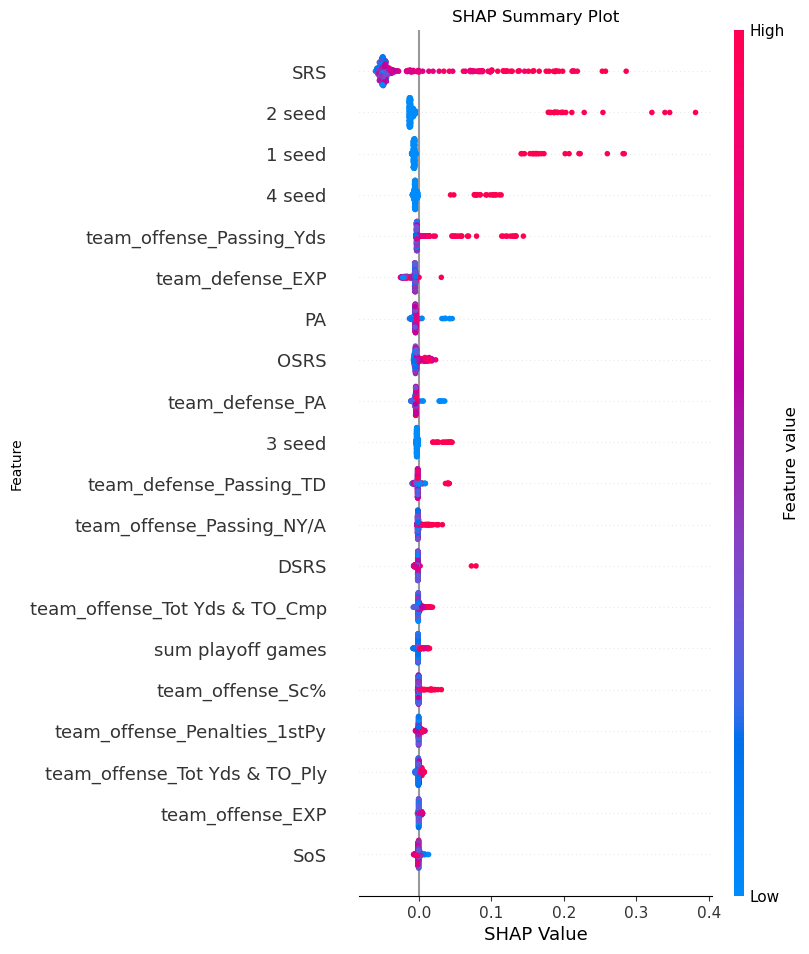

In [6]:
#explaining the features importance with shap for visualization, and different perspective.
import matplotlib.pyplot as plt
import shap

# Explain the Model Predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test[features])

# Summary Plot of Feature Importance
shap.summary_plot(shap_values, test[features], feature_names=features, show=False)

# Add border, title, x-axis label, and y-axis label
plt.gca().set_title("SHAP Summary Plot")
plt.gca().set_xlabel("SHAP Value")
plt.gca().set_ylabel("Feature")

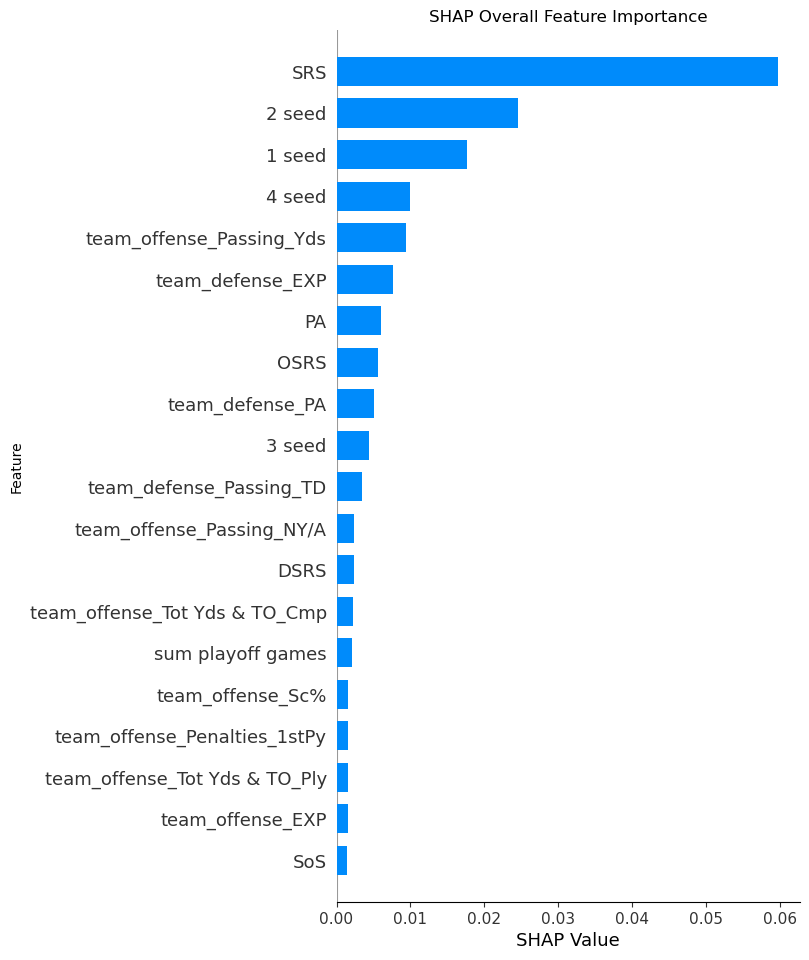

In [7]:
# Explain the Model Predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test[features])

# Bar Chart of Feature Importance
fig, ax = plt.subplots(figsize=(12, 8))
shap.summary_plot(shap_values, test[features], feature_names=features, plot_type='bar', show=False)
plt.title("SHAP Overall Feature Importance")
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.show()